In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, MaxPool2D
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
from keras.applications.inception_v3 import InceptionV3 

In [4]:
#model = InceptionV3(include_top= False,input_shape=(112,112,3))
#print(model.summary())

KeyboardInterrupt: 

In [4]:
outputs = [layer.output for layer in model.layers]

NameError: name 'model' is not defined

In [ ]:
outputs[143]

In [3]:
from keras.layers import Flatten,Dropout,Dense,Activation,Input
from keras.models import Model
new_input = Input(shape=(224, 224, 1))
model1 = InceptionV3(include_top = False, input_shape=(112,112,3))
layer = model1.get_layer('activation_28').output
print(layer.shape)


(None, 11, 11, 96)


In [4]:
x = Flatten()(layer)
#x = Dropout(0.5)(x)
x = Dense(128,activation = 'relu')(x)
#x = Dropout(0.25)(x)
x = Dense(64,activation = 'relu')(x)
#x = Dropout(0.25)(x)
out = Dense(3,activation = 'softmax')(x)
model = Model(model1.input,out)
print(out.shape)

(None, 3)


In [5]:
def import_maps(path):
    images = []
    for index, name in enumerate(os.listdir(path)):
        folder = os.path.join(path, name)
        for file_class in os.listdir(folder):
            im_folder = os.path.join(folder, file_class)
            for im in os.listdir(im_folder):
                img = cv2.imread(os.path.join(im_folder, im))
                #print(img.shape)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                    img1 = cv2.resize(img, (112, 112))
                    img = np.dstack((img1,img1,img1))
                if img is not None:
               #     img = (img-np.mean(img))/np.std(img)
                    images.append((np.array(img), index)) 
    return images

In [6]:
image_train_set = import_maps(r'C:\Users\AIIMS-IITD\Desktop\Sanjeev\4_class_cluster_volume\Train')
image_test_set = import_maps(r'C:\Users\AIIMS-IITD\Desktop\Sanjeev\4_class_cluster_volume\Test')

In [7]:
train_images_all = [i[0] for i in image_train_set]
train_images_array = np.array(train_images_all)
#train_images_array=np.expand_dims(train_images_array,axis=3)
train_image_label = [i[1] for i in image_train_set]
train_image_label = np.array(train_image_label)

In [8]:
test_images_all = [i[0] for i in image_test_set]
test_images_array = np.array(test_images_all)
test_images_array=np.expand_dims(test_images_array,axis=3)
test_image_label = [i[1] for i in image_test_set]
test_image_label = np.array(test_image_label)

In [9]:
scalar = StandardScaler(copy=False)
train_images = scalar.fit_transform(train_images_array.reshape(len(train_images_array), 112*112*3))
train_images_array = train_images.reshape(len(train_images_array), 112,112, 3)

In [10]:
train_x, val_x, train_y, val_y = train_test_split(train_images_array,train_image_label,test_size=0.2)

In [11]:
enc = OneHotEncoder(handle_unknown='ignore')
train_label_enc = enc.fit_transform(train_y.reshape(-1, 1)).toarray()
val_label_enc = enc.fit_transform(val_y.reshape(-1, 1)).toarray()
test_label_enc = enc.fit_transform(test_image_label.reshape(-1, 1)).toarray()

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer = keras.optimizers.SGD(0.001),metrics=['accuracy','AUC'])

In [13]:
history = model.fit(train_x,train_label_enc,validation_data=(val_x,val_label_enc), batch_size=32, epochs=50, verbose=1,shuffle=True)

Epoch 1/50
377/377 [==============================] - 51s 35ms/step - loss: 0.9373 - accuracy: 0.5626 - auc: 0.7582 - val_loss: 0.7995 - val_accuracy: 0.6785 - val_auc: 0.8526
Epoch 2/50
377/377 [==============================] - 10s 27ms/step - loss: 0.6465 - accuracy: 0.7894 - auc: 0.9282 - val_loss: 0.5371 - val_accuracy: 0.8569 - val_auc: 0.9593
Epoch 3/50
377/377 [==============================] - 10s 27ms/step - loss: 0.4177 - accuracy: 0.9107 - auc: 0.9819 - val_loss: 0.3423 - val_accuracy: 0.9299 - val_auc: 0.9895oss: 0.4223 - accuracy: 0.90
Epoch 4/50
377/377 [==============================] - 10s 27ms/step - loss: 0.2548 - accuracy: 0.9632 - auc: 0.9964 - val_loss: 0.2077 - val_accuracy: 0.9681 - val_auc: 0.9984accuracy: 0.9598 - auc:  - ETA: 1s - loss: 0.2669 -  - ETA: 0s - loss: 0.2604 
Epoch 5/50
377/377 [==============================] - 10s 27ms/step - loss: 0.1538 - accuracy: 0.9839 - auc: 0.9993 - val_loss: 0.1321 - val_accuracy: 0.9854 - val_auc: 0.9996TA: 5s - loss: 

In [20]:
test_image = scalar.fit_transform(test_images_array.reshape(len(test_images_array),112*112*3))
test_image_array = test_image.reshape(len(test_images_array),112,112,3)

In [21]:
score = model.evaluate(test_image_array,test_label_enc, batch_size=32)

73/73 [==============================] - 1s 10ms/step - loss: 2.2327 - accuracy: 0.4589 - auc: 0.6568


In [22]:
y_predict = model.predict(test_image_array)

In [23]:
y_predict_bool = np.argmax(y_predict,axis=1).tolist()

In [24]:
from sklearn.metrics import *

In [25]:
confusion_matrix(test_image_label,y_predict_bool)

array([[385, 212, 213],
       [125, 299, 326],
       [129, 245, 376]], dtype=int64)

In [1]:
fpr,tpr,thresholds = roc_curve(test_image_label,y_predict_bool,pos_label=2)
print(auc(fpr,tpr))

NameError: name 'roc_curve' is not defined

In [28]:
print(classification_report(test_image_label,y_predict_bool))

              precision    recall  f1-score   support

           0       0.60      0.48      0.53       810
           1       0.40      0.40      0.40       750
           2       0.41      0.50      0.45       750

    accuracy                           0.46      2310
   macro avg       0.47      0.46      0.46      2310
weighted avg       0.47      0.46      0.46      2310



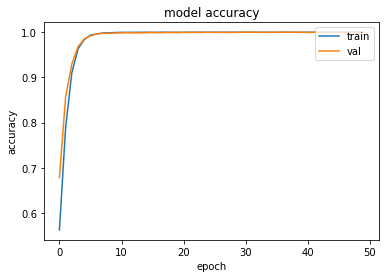

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

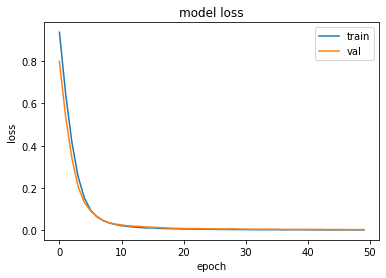

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

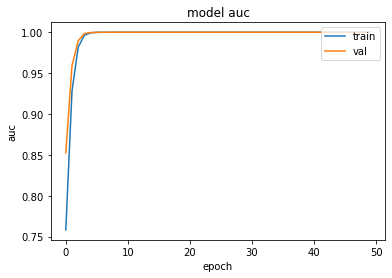

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [32]:
model.save_weights('model_inception.h5')